In this approach i have tried with  different smapling and other techniques to  handle the imbalace data

In [3]:
import pandas as pd

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
dataset=pd.read_csv('F:/data_science/python/ML/projects/credit_card-defaulters_dataset.csv')

In [221]:
dataset.head()

,ID,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default Status
0,1,2.0,24,3913.0,312.0,689.0,NaN,NaN,NaN,NaN,689.0,NaN,NaN,NaN,NaN,Default
1,2,12.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,NaN,1.0,1.0,1.0,NaN,2.0,Default
2,3,9.0,34,29239.0,1427.0,13559.0,14331.0,14948.0,15549.0,1518.0,15.0,1.0,1.0,1.0,5.0,Not Default
3,4,5.0,37,4699.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,219.0,12.0,11.0,169.0,1.0,Not Default
4,5,5.0,57,8617.0,567.0,35835.0,294.0,19146.0,19131.0,2.0,36681.0,1.0,9.0,689.0,679.0,Not Default


In [222]:
dataset.shape

(30000, 16)

In [223]:
dataset.isnull().sum()

ID                   0
LIMIT_BAL            0
AGE                  0
BILL_AMT1         2008
BILL_AMT2         2506
BILL_AMT3         2870
BILL_AMT4         3195
BILL_AMT5         3506
BILL_AMT6         4020
PAY_AMT1          5249
PAY_AMT2          5396
PAY_AMT3          5968
PAY_AMT4          6408
PAY_AMT5          6703
PAY_AMT6          7173
Default Status       0
dtype: int64

In [247]:
dataset['Default Status'].value_counts()

Not Default    23364
Default         6636
Name: Default Status, dtype: int64

In [248]:
data=dataset.copy()

In [249]:
data.shape

(30000, 16)

In [56]:
#neg_index=x[x['BILL_AMT1']<0].index.tolist()

In [250]:
#now removng the age less than 18 becuase credit card could not provide to this age
data=data[data['AGE']>=18]

In [251]:
data.shape

(27247, 16)

In [252]:
nul_feature=[feature for feature in data.columns if data[feature].isnull().sum() >=1]

In [253]:
len(nul_feature)

12

In [254]:
data.shape

(27247, 16)

In [255]:
x=data.drop('Default Status',axis=1)
y=data[['Default Status']]

In [256]:
x.shape

(27247, 15)

In [257]:
y.shape

(27247, 1)

In [228]:
data.columns

Index(['ID', 'LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

In [258]:
data.drop(['ID'],axis=1,inplace=True)

In [259]:
data.dropna(thresh=4,axis=0,inplace=True)

In [260]:
data.shape

(26531, 15)

In [261]:
data.isnull().sum()

LIMIT_BAL            0
AGE                  0
BILL_AMT1         1100
BILL_AMT2         1573
BILL_AMT3         1888
BILL_AMT4         2182
BILL_AMT5         2470
BILL_AMT6         2934
PAY_AMT1          4076
PAY_AMT2          4179
PAY_AMT3          4718
PAY_AMT4          5126
PAY_AMT5          5392
PAY_AMT6          5826
Default Status       0
dtype: int64

In [ ]:
////////////////////////////understanding///////////////////

In [26]:
data['PAY_AMT1'].std()

12363.278525591753

In [27]:
bill=data['PAY_AMT1'].fillna(data['PAY_AMT1'].median())

In [76]:
pd.DataFrame(bill)

,BILL_AMT1
0,3913.0
1,2682.0
2,29239.0
3,4699.0
4,8617.0
5,644.0
6,367965.0
7,11876.0
8,11285.0
9,8526.0


In [28]:
bill.std()

11407.79121153696

In [29]:
bill=data['PAY_AMT1'].fillna(data['PAY_AMT1'].mean())

In [30]:
bill.std()

11373.96499992046

In [31]:
bill=data['PAY_AMT1'].fillna(data['PAY_AMT1'].mode())

In [32]:
bill.std()  #here we can see that the original data distibu. and replce with mode distrib. is same 

12363.01538284636

In [ ]:
#bill1= same ; mode
#bill2= same ; mode

#pay1 = same ; mode

In [27]:
data['PAY_AMT1'].describe()

count     22455.000000
mean       2599.400891
std       12363.278526
min           1.000000
25%          15.000000
50%         165.000000
75%        1661.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64

In [28]:
data['BILL_AMT6'].describe()

count     23597.00000
mean      28385.55274
std       51537.80635
min      -94625.00000
25%        1266.00000
50%        7814.00000
75%       29382.00000
max      961664.00000
Name: BILL_AMT6, dtype: float64

In [262]:
nul_feature

['BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

In [ ]:
/////////////////understand//////////////////

In [263]:
for feature in nul_feature:
    data[feature]=data[feature].fillna(data[feature].mode()[0])

In [264]:
data.isnull().sum()

LIMIT_BAL         0
AGE               0
BILL_AMT1         0
BILL_AMT2         0
BILL_AMT3         0
BILL_AMT4         0
BILL_AMT5         0
BILL_AMT6         0
PAY_AMT1          0
PAY_AMT2          0
PAY_AMT3          0
PAY_AMT4          0
PAY_AMT5          0
PAY_AMT6          0
Default Status    0
dtype: int64

In [265]:
import seaborn as sns

AttributeError: 'DataFrame' object has no attribute 'Age_median'

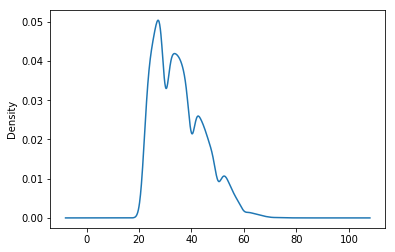

In [38]:
#stll in progress
fig = plt.figure()
ax = fig.add_subplot(111)
data['AGE'].plot(kind='kde', ax=ax)
data.Age_median.plot(kind='kde', ax=ax, color='red')
data.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

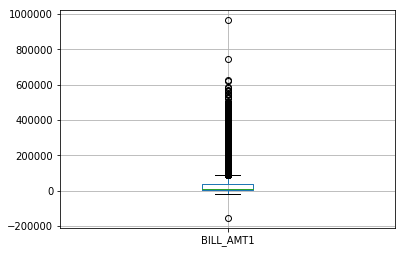

In [266]:
data.boxplot(column='BILL_AMT1')

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


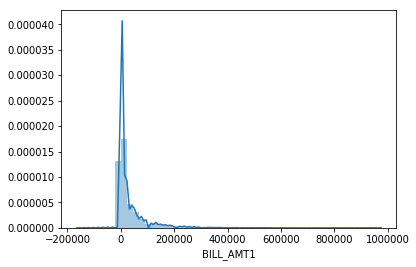

In [42]:
sns.distplot(data['BILL_AMT1'])

In [199]:
#handling outliers

In [34]:
IQR=data['BILL_AMT1'].quantile(0.75)-data['BILL_AMT1'].quantile(0.25)

In [35]:
lower_bridge=data['BILL_AMT1'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['BILL_AMT1'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-49699.0
86101.0


(None, None)

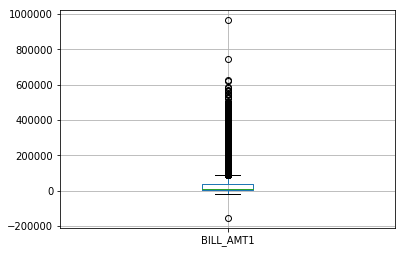

In [45]:
data.boxplot(column='BILL_AMT1')

In [46]:
lower_bridge=data['BILL_AMT1'].quantile(0.25)-(IQR*1.5)
upper_bridge=data['BILL_AMT1'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-49699.0
86101.0


(None, None)

In [47]:
data.BILL_AMT1.describe()

count     26531.000000
mean      32327.120689
std       60410.903824
min     -154973.000000
25%        1226.000000
50%        7521.000000
75%       35176.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64

In [267]:
out_data=data.copy()

In [268]:
out_data.shape

(26531, 15)

In [269]:
def null_out(frame,feature):
    for variable in feature:
        
        IQR=frame[variable].quantile(0.75)-frame[variable].quantile(0.25)
        max_iqr=frame[variable].quantile(0.75)+(IQR*1.5)
        min_iqr=frame[variable].quantile(0.25)-(IQR*1.5)
        frame.loc[frame[variable]>=max_iqr,variable]=max_iqr
        frame.loc[frame[variable]<=min_iqr,variable]=min_iqr
    return frame

In [270]:
data2=null_out(out_data,['LIMIT_BAL', 'AGE','BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

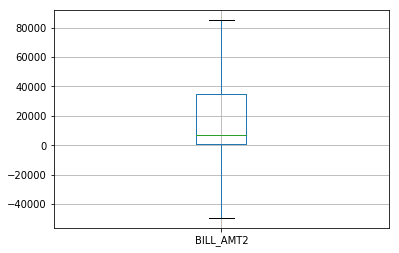

In [271]:
data2.boxplot(column='BILL_AMT2')

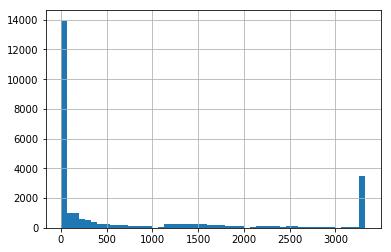

In [242]:
data2.PAY_AMT2.hist(bins=50)

In [272]:
out_data.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default Status'],
      dtype='object')

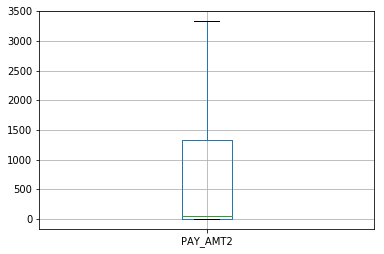

In [244]:
out_data.boxplot(column='PAY_AMT2')

In [273]:
out_data['Default Status'].value_counts()

Not Default    20753
Default         5778
Name: Default Status, dtype: int64

In [274]:
from sklearn.model_selection import train_test_split

In [275]:
data=out_data.drop('Default Status',axis=1)

In [276]:
target=out_data['Default Status']

In [48]:
out_data.drop('Default Status',axis=1,inplace=True)

In [49]:
x_train,x_test,y_train,y_test=train_test_split(data,target,test_size=0.3,random_state=2)

In [50]:
print(x_train.shape)
print(x_test.shape)

(18571, 14)
(7960, 14)


In [113]:
y_test['Default state'].value_counts()

1    6184
0    1776
Name: Default state, dtype: int64

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [114]:
model=RandomForestClassifier(n_estimators=100)

In [115]:
model.fit(x_train,y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier()

In [116]:
model.score(x_test,y_test['Default state'])

0.778643216080402

In [117]:
pred_y=model.predict(x_test)

In [118]:
from sklearn.metrics import classification_report 

In [129]:
report=classification_report(pred_y,y_test['Default state'])

In [130]:
print(report)

              precision    recall  f1-score   support

           0       0.07      0.53      0.13       250
           1       0.98      0.79      0.87      7710

    accuracy                           0.78      7960
   macro avg       0.53      0.66      0.50      7960
weighted avg       0.95      0.78      0.85      7960



In [119]:
from sklearn.metrics import confusion_matrix

In [120]:
matrix=confusion_matrix(pred_y,y_test)

In [121]:
matrix  #imbalance still 

array([[ 132,  118],
       [1644, 6066]], dtype=int64)

In [63]:
y_train=pd.DataFrame(y_train,columns=['Default Status'])

In [64]:
type(y_train)

pandas.core.frame.DataFrame

### lets handle the imbalance dataset

In [100]:
x_test.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
24367,32.0,39.0,31243.0,39.0,18918.0,71356.0,2588.0,969.0,2.0,3328.0,2094.5,134.0,1438.5,1458.5
14751,2.0,41.0,6249.0,5965.0,2417.0,1616.0,1616.0,367.0,2.0,2.0,2.0,1.0,367.0,1.0
22007,8.0,24.0,42377.0,32482.0,2782.0,11632.0,64989.0,62392.0,28.0,1.0,2094.5,1543.5,147.0,527.0
3943,2.0,31.0,261.0,6229.0,5815.0,851.0,229.0,1997.0,3365.5,3328.0,854.0,229.0,1438.5,1342.0
135,24.0,34.0,1674.0,1235.0,13681.0,13269.0,14158.0,13891.0,15.0,18.0,2.0,1.0,1.0,327.0


In [65]:
y_train.head()

,Default Status
21677,Not Default
21222,Not Default
29766,Not Default
19917,Not Default
24784,Default


In [66]:
from sklearn import preprocessing

In [67]:
label_encoder=preprocessing.LabelEncoder()
y_train['label']=label_encoder.fit_transform(y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [69]:
y_train.head()

,label
21677,1
21222,1
29766,1
19917,1
24784,0


In [68]:
y_train.drop(['Default Status'],axis=1,inplace=True)

In [81]:
y_test=pd.DataFrame(y_test,columns=['Default Status'])

In [82]:
y_test.head()

,Default Status
24367,Not Default
14751,Not Default
22007,Not Default
3943,Not Default
135,Not Default


In [73]:
type(y_train['label'])

pandas.core.series.Series

In [80]:
y_test.index

Index([   24367,    14751,    22007,     3943,      135,     1389,    25654,
          21068,    11005,    27936,
       ...
          22583,     8407,    23735,    28467,    10277,     3091,    17133,
          18378,    13570, 'label1'],
      dtype='object', length=7961)

In [84]:
y_test.drop(['label1'],axis=0,inplace=True)

In [75]:
label_encoder2=preprocessing.LabelEncoder()

In [85]:
y_test['label1']=label_encoder2.fit_transform(y_test)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [86]:
y_test.drop(['Default Status'],axis=1,inplace=True)

In [87]:
y_test.head()

,label1
24367,1
14751,1
22007,1
3943,1
135,1


In [88]:
y_test.rename(columns={'label1':'Default state'},inplace=True)

In [89]:
y_train.rename(columns={'label':'Default state'},inplace=True)

In [90]:
y_train.head()

,Default state
21677,1
21222,1
29766,1
19917,1
24784,0


In [91]:
print(x_test.shape),print(y_test.shape)

(7960, 14)
(7960, 1)


(None, None)

In [152]:
class_weight=dict({0:100,1:1})

In [204]:
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(x_train,y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight={0: 100, 1: 1},
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [193]:
from sklearn.metrics import accuracy_score

#we can see that the belove metrics is also not good for practical implimentation so try new technique to tackle this imbalance data

In [205]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 247 1529]
 [ 372 5812]]
0.7611809045226131
             precision    recall  f1-score   support

          0       0.40      0.14      0.21      1776
          1       0.79      0.94      0.86      6184

avg / total       0.70      0.76      0.71      7960



In [111]:
y_test['Default state'].value_counts()

1    6184
0    1776
Name: Default state, dtype: int64

In [92]:
matrix

array([[ 128,  108],
       [1648, 6076]], dtype=int64)

### down sampling 

In [104]:
from collections import Counter
Counter(y_test['Default state'])

Counter({0: 1776, 1: 6184})

In [94]:
Counter({0: 199017, 1: 347})

Counter({0: 199017, 1: 347})

In [2]:
from collections import Counter
from imblearn.under_sampling import NearMiss

In [105]:
ns=NearMiss(0.8)
X_train_ns,y_train_ns=ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train['Default state'])))
print("The number of classes after fit {}".format(Counter(y_train_ns['Default state'])))

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({1: 14569, 0: 4002})
The number of classes after fit Counter({1: 5002, 0: 4002})


In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [109]:
from sklearn.metrics import accuracy_score

In [110]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1205  571]
 [3980 2204]]
0.4282663316582915
              precision    recall  f1-score   support

           0       0.23      0.68      0.35      1776
           1       0.79      0.36      0.49      6184

    accuracy                           0.43      7960
   macro avg       0.51      0.52      0.42      7960
weighted avg       0.67      0.43      0.46      7960



In [101]:
y_train['Default state'].value_counts()

1    14569
0     4002
Name: Default state, dtype: int64

In [102]:
x_train.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

### up sampling 

In [131]:
from imblearn.over_sampling import RandomOverSampler

In [134]:
os=RandomOverSampler(0.75)
X_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train['Default state'])))
print("The number of classes after fit {}".format(Counter(y_train_ns['Default state'])))

The number of classes before fit Counter({1: 14569, 0: 4002})
The number of classes after fit Counter({1: 14569, 0: 10926})


C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


In [135]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train_ns,y_train_ns)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier()

In [136]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 259 1517]
 [ 307 5877]]
0.770854271356784
              precision    recall  f1-score   support

           0       0.46      0.15      0.22      1776
           1       0.79      0.95      0.87      6184

    accuracy                           0.77      7960
   macro avg       0.63      0.55      0.54      7960
weighted avg       0.72      0.77      0.72      7960



In [138]:
y_test['Default state'].value_counts()

1    6184
0    1776
Name: Default state, dtype: int64

### smote technique

In [140]:
from imblearn.combine import SMOTETomek

In [405]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train['Default state'])))
print("The number of classes after fit {}".format(Counter(y_train_ns['Default state'])))

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\imblearn\utils\_validation.py:638: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning)


The number of classes before fit Counter({1: 14569, 0: 4002})
The number of classes after fit Counter({1: 13900, 0: 10257})


In [153]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(class_weight=class_weight)
classifier.fit(X_train_ns,y_train_ns)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(class_weight={0: 100, 1: 1})

In [154]:
y_pred=classifier.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 249 1527]
 [ 481 5703]]
0.7477386934673367
              precision    recall  f1-score   support

           0       0.34      0.14      0.20      1776
           1       0.79      0.92      0.85      6184

    accuracy                           0.75      7960
   macro avg       0.56      0.53      0.52      7960
weighted avg       0.69      0.75      0.70      7960



### ensemble technique

In [409]:
from imblearn.ensemble import EasyEnsembleClassifier

In [167]:
easy=EasyEnsembleClassifier()
easy.fit(x_train,y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


EasyEnsembleClassifier()

In [169]:
y_pred=easy.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[1109  667]
 [2307 3877]]
0.6263819095477386
              precision    recall  f1-score   support

           0       0.32      0.62      0.43      1776
           1       0.85      0.63      0.72      6184

    accuracy                           0.63      7960
   macro avg       0.59      0.63      0.57      7960
weighted avg       0.74      0.63      0.66      7960



In [ ]:
#lets try with xgboost

In [170]:

import xgboost

In [399]:
classifier=xgboost.XGBClassifier()

In [400]:
classifier.fit(x_train,y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [401]:
classifier.score(x_test,y_test)

0.7709798994974875

In [402]:
pred=classifier.predict(x_test)

In [403]:
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[ 273 1503]
 [ 320 5864]]
0.7709798994974875
              precision    recall  f1-score   support

           0       0.46      0.15      0.23      1776
           1       0.80      0.95      0.87      6184

    accuracy                           0.77      7960
   macro avg       0.63      0.55      0.55      7960
weighted avg       0.72      0.77      0.72      7960



In [278]:
target1=pd.DataFrame(target)

In [279]:
target1['Default Status1']=label_encoder.fit_transform(target1)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [282]:
target1.head()

,Default Status1
0,0
1,0
2,1
3,1
4,1


In [283]:
target1.shape

(26531, 1)

In [220]:
data.shape

(26531, 14)

In [281]:
target1.drop('Default Status',axis=1,inplace=True)

In [284]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,data,target1,cv=10)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [286]:
score

array([0.76337604, 0.79080286, 0.77384093, 0.77384093, 0.77572559,
       0.773464  , 0.78854127, 0.77987184, 0.78326423, 0.77949491])

In [287]:
score.mean()

0.7782222624939249

In [ ]:
//////////////////the kfold test has finished //////////////////////////

In [ ]:
/////////////////// experiment with xgboost with smote data etc///////////

In [388]:
params={
 "learning_rate"    : [0.01, 0.03, 0.05, 0.07, 0.10, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [373]:
from sklearn.model_selection import RandomizedSearchCV

In [389]:
classifier_cv=xgboost.XGBClassifier()

In [390]:
random_search=RandomizedSearchCV(classifier_cv,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [391]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.9min finished
C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [392]:
random_search.best_params_

{'colsample_bytree': 0.3,
 'gamma': 0.1,
 'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 7}

In [393]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [396]:
classifier_cv=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [397]:
classifier_cv.fit(x_train,y_train)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [398]:
y_pred=classifier_cv.predict(x_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 112 1664]
 [  71 6113]]
0.782035175879397
              precision    recall  f1-score   support

           0       0.61      0.06      0.11      1776
           1       0.79      0.99      0.88      6184

    accuracy                           0.78      7960
   macro avg       0.70      0.53      0.50      7960
weighted avg       0.75      0.78      0.71      7960



In [406]:
# with the smote technique data
classifier_smote=xgboost.XGBClassifier()
classifier_smote.fit(X_train_ns,y_train_ns)

C:\Users\Jigar Kumar\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [407]:
pred=classifier_smote.predict(x_test)

In [408]:
#y_pred=classifier_smote.predict(x_test)
print(confusion_matrix(y_test,pred))
print(accuracy_score(y_test,pred))
print(classification_report(y_test,pred))

[[ 318 1458]
 [ 412 5772]]
0.7650753768844221
              precision    recall  f1-score   support

           0       0.44      0.18      0.25      1776
           1       0.80      0.93      0.86      6184

    accuracy                           0.77      7960
   macro avg       0.62      0.56      0.56      7960
weighted avg       0.72      0.77      0.73      7960



Here we can see that after applying the approach of imbalance dataset we are having the good result compared to previous one but still we can increase the accuracy by exploring and appying the differenet techniques.